# 🚀 YouTube Video View Prediction (Real Data Implementation)

This notebook loads your cleaned CSV datasets from the `DSA-210-PROJECT` repository, merges them, and trains a machine learning model to classify videos into `low`, `medium`, or `high` view count tiers.

In [1]:
## 1. Clone the repository (if not already cloned)
!git clone https://github.com/Someone-hash-gif/DSA-210-PROJECT.git

fatal: destination path 'DSA-210-PROJECT' already exists and is not an empty directory.


In [2]:
## 2. Import libraries
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.sparse import hstack
import matplotlib.pyplot as plt

In [3]:
## 3. Load and merge CSV datasets
csv_dir = 'DSA-210-PROJECT'  # Path to cloned repo
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
print(f"Found CSV files: {csv_files}")
dfs = []
for fname in csv_files:
    path = os.path.join(csv_dir, fname)
    dfs.append(pd.read_csv(path))
df = pd.concat(dfs, ignore_index=True)
print(f"Merged DataFrame shape: {df.shape}")

Found CSV files: ['keyword_videos4.csv', 'keyword_videos2016-2018.csv', 'keyword_videos2.csv', 'keyword_videos2018-220.csv', 'keyword_videos5.csv', 'keyword_videos1.csv', 'keyword_videos2025.csv', 'keyword_videos2024-10.csv']
Merged DataFrame shape: (3040, 2)


In [29]:
## Inspect column names and auto-detect relevant fields
print("Columns available:", df.columns.tolist())
# Auto-detect
view_col = [c for c in df.columns if 'view' in c.lower()][0]
keyword_col = [c for c in df.columns if 'keyword' in c.lower()][0]
category_col = [c for c in df.columns if 'category' in c.lower()][0]
print(f"Using view column: {view_col}, keyword column: {keyword_col}, category column: {category_col}")

Columns available: ['keyword', 'video_id', 'channel_title', 'channel_id', 'video_publish_date', 'video_title', 'video_description', 'video_category', 'video_view_count', 'video_comment_count', 'video_like_count', 'video_dislike_count', 'video_thumbnail', 'video_tags', 'collection_date']
Using view column: video_view_count, keyword column: keyword, category column: video_category


In [26]:
import datetime, pandas as pd

def str_to_dict(s):
    # only expose datetime in the eval environment
    return eval(s, {'__builtins__': None, 'datetime': datetime})

# Expand in one go
df_expanded = df['video_id'] \
    .apply(str_to_dict) \
    .apply(pd.Series)

# Merge
df = pd.concat([df.drop(columns='video_id'), df_expanded], axis=1)


In [27]:
df

,keyword,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date
0,amazing,4H0KPPNfll4,Droview,UCKfW9ZAgvINBxjny7pBFugg,1.744191e+09,Skyview of jakarta city With Amazing flyover,#droview #skyview #skyline #amazing #views,19,190486,156,5006,None,https://i.ytimg.com/vi/4H0KPPNfll4/hqdefault.jpg,,2025-04-25 17:33:42.104156
1,amazing,Lieh4rn26os,Viral Monkey,UCReyCcM-8JXsstlj89R8kGQ,1.737367e+09,Like a Boss Compilation! Amazing People That A...,#likeaboss #respect #puvideo #amazingpeople ...,24,128582,22,1139,None,https://i.ytimg.com/vi/Lieh4rn26os/hqdefault.jpg,beautiful world|incredible world|a beautiful l...,2025-04-25 17:33:42.104212
2,amazing,ZkpXCXRrz24,Worksmart_fanadamAR001,UChHVWTeZ0at-b4VGbA6OkOA,1.744882e+09,7 art amazing part0002🤩✅ #art #engineering #di...,,22,39746,1,614,None,https://i.ytimg.com/vi/ZkpXCXRrz24/hqdefault.jpg,,2025-04-25 17:33:42.104220
3,amazing,t3D_bKyVmnw,Ricky Dillard - Topic,UCTvj08e1IKbG4VuCYketOKw,1.741420e+09,Amazing,Provided to YouTube by Light Records\n\nAmazin...,10,28206,12,437,None,https://i.ytimg.com/vi/t3D_bKyVmnw/hqdefault.jpg,Ricky Dillard & New G|Amazing,2025-04-25 17:33:42.104228
4,amazing,5NAw9KNvMp0,InfinityReel,UCKIsNAEWwsCIXLz-W7_Ny0g,1.744632e+09,The END results looks amazing!!! That transiti...,,22,20846655,3217,962436,None,https://i.ytimg.com/vi/5NAw9KNvMp0/hqdefault.jpg,,2025-04-25 17:33:42.104234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,must see,QdOMwTWpW9w,DEEPFACE,UC6B6RDo6cGgtvwF6-k-tEuA,1.743433e+09,Mesmerizing Swan Dance Stuns Judges on AGT | M...,🔥 Mesmerizing Swan Dance Stuns Judges on AGT |...,24,30657793,172,211143,None,https://i.ytimg.com/vi/QdOMwTWpW9w/hqdefault.jpg,AGT swan dance|mesmerizing dance AGT|AGT 2025 ...,2025-04-25 17:48:48.174566
3036,must see,qcg5I_vu5rU,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,1.743122e+09,MUST-SEE ENDING! Bulls vs Lakers 🤯,,17,374797,764,14677,None,https://i.ytimg.com/vi/qcg5I_vu5rU/hqdefault.jpg,,2025-04-25 17:48:48.174570
3037,must see,1RKL8kNo5DU,Kaaru varsha Vlogs,UCjeYD00myTH1zxo-16FmUmQ,1.745466e+09,મને પૈસા આપો #પૈસા -#TrendingNow #WatchNow #Su...,મને પૈસા આપો #પૈસા -#TrendingNow #WatchNow #Su...,22,17544,0,142,None,https://i.ytimg.com/vi/1RKL8kNo5DU/hqdefault.jpg,,2025-04-25 17:48:48.174575
3038,must see,Ql6m57sper8,AB Shorts 123,UCCRcJVrtwWzCUMi45JtKUGQ,1.745281e+09,"""Discover Unreal Tyre Techniques You Must See!...",Unlock the Power of Smart Learning with Innova...,22,30196,1,140,None,https://i.ytimg.com/vi/Ql6m57sper8/hqdefault.jpg,,2025-04-25 17:48:48.174580


In [30]:
## 4. Data cleaning
# Drop rows with missing values in key columns
df = df.dropna(subset=[keyword_col, category_col, view_col])
# Ensure view counts are numeric
df[view_col] = pd.to_numeric(df[view_col], errors='coerce')
df = df.dropna(subset=[view_col])
df[view_col] = df[view_col].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   keyword              3040 non-null   object        
 1   video_id             3040 non-null   object        
 2   channel_title        3040 non-null   object        
 3   channel_id           3040 non-null   object        
 4   video_publish_date   3040 non-null   float64       
 5   video_title          3040 non-null   object        
 6   video_description    3040 non-null   object        
 7   video_category       3040 non-null   object        
 8   video_view_count     3040 non-null   int64         
 9   video_comment_count  2999 non-null   object        
 10  video_like_count     2960 non-null   object        
 11  video_dislike_count  0 non-null      object        
 12  video_thumbnail      3040 non-null   object        
 13  video_tags           3040 non-nul

In [31]:
## 5. Create view level buckets
df['view_level'] = pd.cut(
    df[view_col],
    bins=[0, 10000, 100000, df[view_col].max()+1],
    labels=['low', 'medium', 'high']
)
print(df['view_level'].value_counts())

view_level
high      2260
medium     501
low        279
Name: count, dtype: int64


In [33]:
## 6. Feature engineering
# TF-IDF on keywords
vectorizer = TfidfVectorizer(max_features=500)
X_keywords = vectorizer.fit_transform(df[keyword_col])
# One-Hot Encoding on category
encoder = OneHotEncoder(sparse_output=True)
X_category = encoder.fit_transform(df[[category_col]])
# Combine features and prepare target
X = hstack([X_keywords, X_category])
y = df['view_level']

In [34]:
## 7. Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
## 8. Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        high       0.83      0.93      0.88       466
         low       0.50      0.39      0.44        51
      medium       0.47      0.24      0.32        91

    accuracy                           0.78       608
   macro avg       0.60      0.52      0.55       608
weighted avg       0.75      0.78      0.76       608



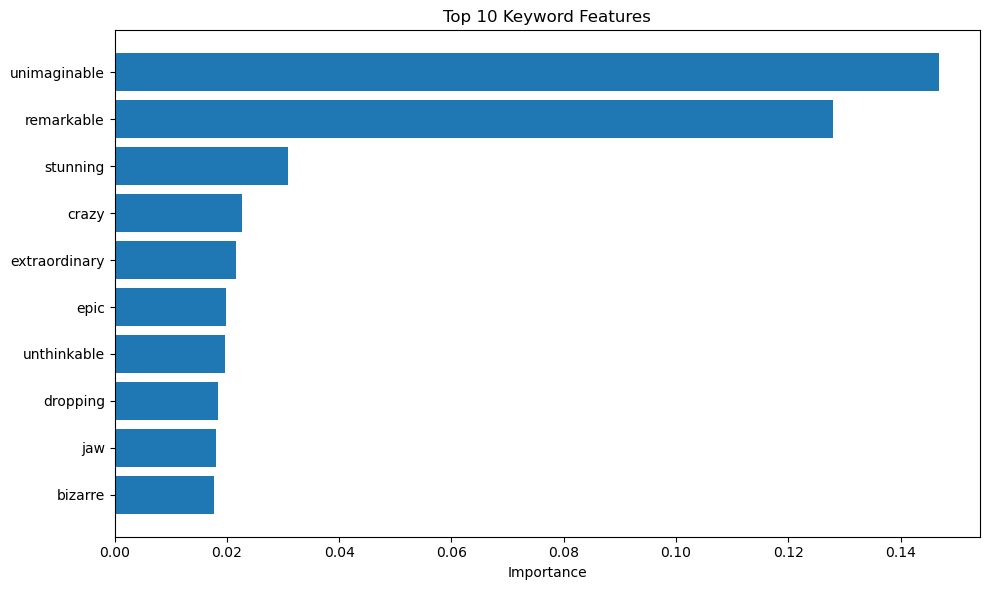

In [36]:
## 9. Feature importance (top 10 keywords)
import numpy as np
import matplotlib.pyplot as plt
keyword_importances = model.feature_importances_[:len(vectorizer.get_feature_names_out())]
indices = np.argsort(keyword_importances)[-10:]
top_keywords = [vectorizer.get_feature_names_out()[i] for i in indices]
top_importances = keyword_importances[indices]
plt.figure(figsize=(10, 6))
plt.barh(top_keywords, top_importances)
plt.xlabel('Importance')
plt.title('Top 10 Keyword Features')
plt.tight_layout()
plt.show()